# 1. Data Collection & Preprocessing

This notebook covers:
- Loading the Amazon Product Reviews dataset
- Cleaning and preprocessing review text
- Mapping star ratings to sentiment labels
- Exploratory Data Analysis (EDA)

**Dataset source:**
- [Amazon Product Reviews (Kaggle)](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/data)

## 1.1 Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_colwidth', 200)
print("Libraries imported and NLTK resources downloaded.")

Libraries imported and NLTK resources downloaded.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1.2 Data Loading

In [2]:
# Load the dataset — adjust the filename to match your downloaded CSV
df = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,

## 1.3 Initial Data Exploration

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [4]:
# Statistical summary
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [5]:
# Missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
dtype: int64

## 1.4 Data Cleaning

In [6]:
# Drop duplicates
print(f"Before dropping duplicates: {df.shape[0]} rows")
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape[0]} rows")

Before dropping duplicates: 28332 rows
After dropping duplicates: 28332 rows


In [7]:
# Drop unnecessary columns
cols_to_keep = ['name', 'primaryCategories', 'reviews.text', 'reviews.rating', 'reviews.title']
df = df[cols_to_keep].copy()

# Drop rows with missing review text or rating
print(f"Before dropping NaN: {df.shape[0]} rows")
df = df.dropna(subset=['reviews.text', 'reviews.rating'])
df['reviews.text'] = df['reviews.text'].astype(str)
print(f"After dropping NaN: {df.shape[0]} rows")

Before dropping NaN: 28332 rows
After dropping NaN: 28332 rows


## 1.5 Text Preprocessing

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Clean and preprocess review text."""
    if not isinstance(text, str):
        return ''
    
    # Lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['reviews.text'].apply(preprocess_text)

# Drop rows where clean_text is empty or NaN
df = df[df['clean_text'].str.strip().astype(bool)].copy()
print(f"After text preprocessing: {df.shape[0]} rows remaining")
df.head()

After text preprocessing: 28232 rows remaining


,name,primaryCategories,reviews.text,reviews.rating,reviews.title,clean_text
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,3,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,order one item bad quality missing backup spring put pc aluminum make battery work
1,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,Bulk is always the less expensive way to go for products like these,4,... always the less expensive way to go for products like,bulk always less expensive way product like
2,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,Well they are not Duracell but for the price i am happy.,5,... are not Duracell but for the price i am happy.,well duracell price happy
3,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,Seem to work as well as name brand batteries at a much better price,5,... as well as name brand batteries at a much better,seem work well name brand battery much better price
4,AmazonBasics AAA Performance Alkaline Batteries (36 Count),Health & Beauty,These batteries are very long lasting the price is great.,5,... batteries are very long lasting the price is great.,battery long lasting price great


## 1.6 Sentiment Label Mapping

Map star ratings to sentiment classes:

| Star Rating | Sentiment |
|-------------|----------|
| 1 - 2       | Negative |
| 3           | Neutral  |
| 4 - 5       | Positive |

sentiment
Positive    25455
Negative     1581
Neutral      1196
Name: count, dtype: int64


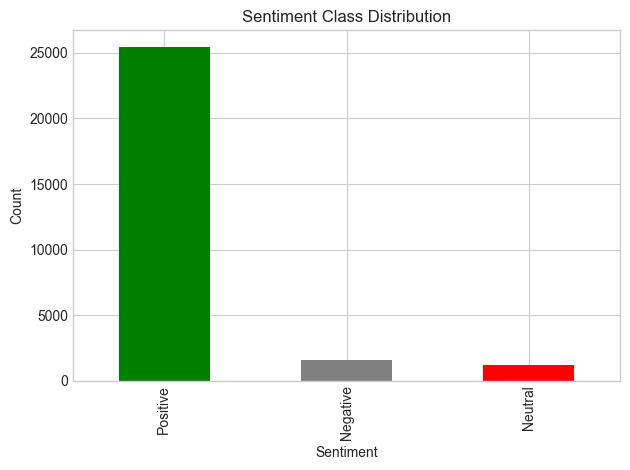

In [9]:
def map_sentiment(rating):
    """Map star rating to sentiment label."""
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply mapping
df['sentiment'] = df['reviews.rating'].apply(map_sentiment)

# Class distribution
print(df['sentiment'].value_counts())
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 1.7 Exploratory Data Analysis (EDA)

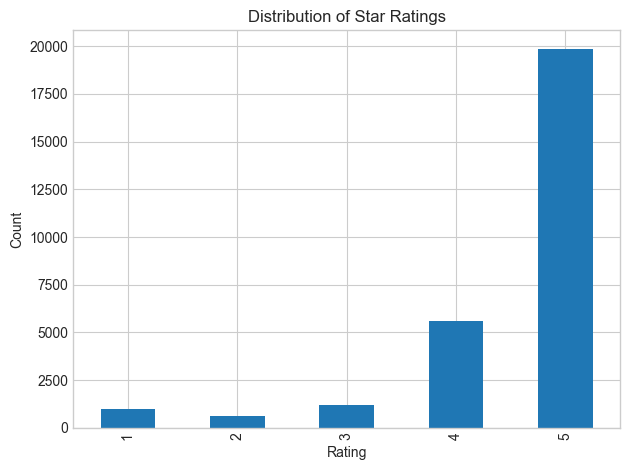

In [10]:
# Distribution of star ratings
df['reviews.rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Star Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

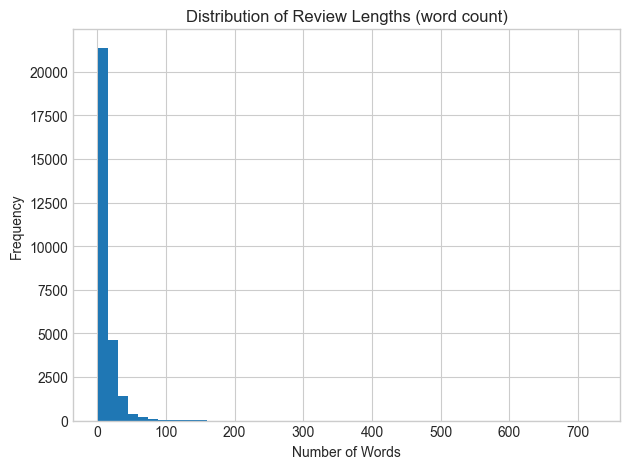

In [11]:
# Review length distribution
df['review_length'] = df['clean_text'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths (word count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

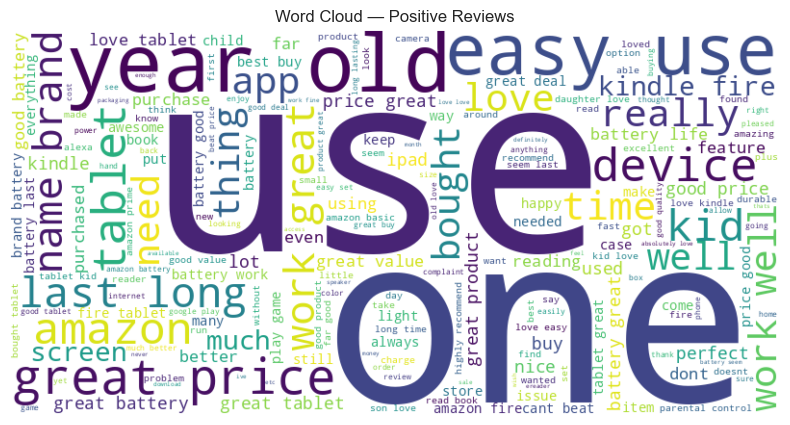

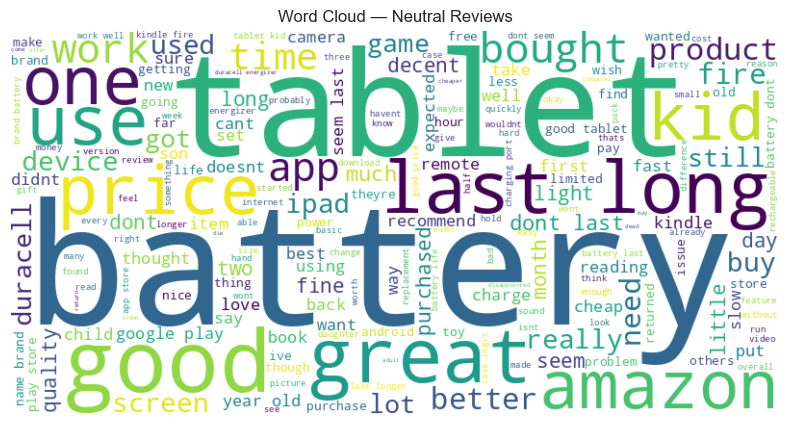

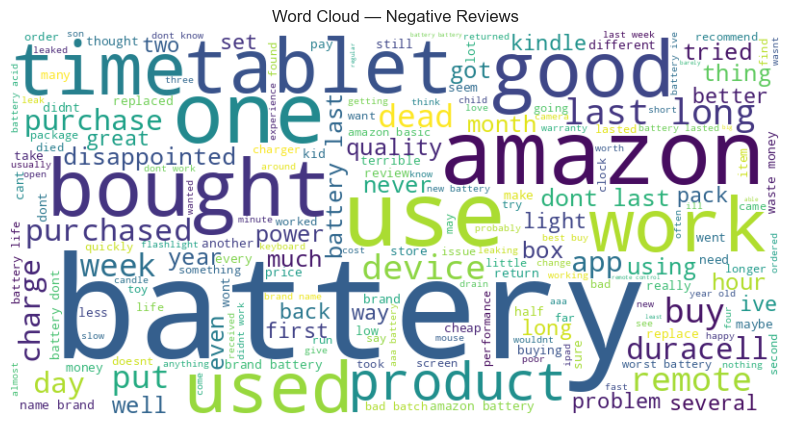

In [12]:
# Word clouds per sentiment 
# !pip install wordcloud
from wordcloud import WordCloud

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud — {sentiment} Reviews')
    plt.axis('off')
    plt.show()

## 1.8 Save Preprocessed Data

In [13]:
df.to_csv('data/preprocessed_reviews.csv', index=False)
print(f"Saved preprocessed data: {df.shape[0]} rows, {df.shape[1]} columns")

Saved preprocessed data: 28232 rows, 8 columns
